# Bayesian Inference with Coin Flips using Python

Objective:
>Use Bayesian updating to estimate the probability of getting heads on a coin using prior beliefs, observed data, and the Beta Binomial model

Tasks:
* Choose prior parameters 𝛼, 𝛽 and explain why you selected them. Beta model: θ∼Beta(α,β)
* Collect data: flip a coin (or simulate coin flips in Python) and record outcome as: heads=1 and tails=0.
* Compute the posterior distribution using the Bayesian updating rule: θ∣X∼Beta(α+x, β+(n−x)) where x = number of heads and n= total number of flips.
* Generate visualizations:
    1. Plot the prior density.
    2. Plot the posterior density and mark the posterior mean on the graph.
* Write an interpretation (5–7 sentences) and discuss:
    1. How your belief about 𝜃 changed after observing the data.
    2. How increasing the number of coin flips affects the concentration of the posterior
distribution.

## Task 1: Choose Prior Parameters



In this case, I am assuming our coin to be fair. This means that we will use a symmetric Beta distribution. (α = β)

Furthermore, I want to chose a weak/uninformative prior, this way we don't assume much before collecting data.


**For these reasons we will start with Beta(1,1).**


## Task 2: Collect data

Now we can start coding. Using `random.randint()` , I will simulate 500 coin flips.

In [1]:
import random

help(random.randint)
# this method takes 2 parameters, a and b
# a random integer in range [a, b] is returned

num_flips = 500
flip_data = [random.randint(a=0, b=1) for _ in range(num_flips)]
print("\n", f"There are {sum(flip_data)} heads in this randomly created dataset.")

Help on method randint in module random:

randint(a, b) method of random.Random instance
    Return random integer in range [a, b], including both end points.


 There are 262 heads in this randomly created dataset.


## Task 3: Compute the posterior distribution

Lets replace this formula with the values we just created.

θ∣X∼Beta(α+x, β+(n−x))


In [2]:
# Prior parameters
alpha_prior = 1
beta_prior = 1

x = sum(flip_data)
n = num_flips

alpha_post = alpha_prior + x
beta_post = beta_prior + (n - x)
print(f"θ∣X∼Beta({alpha_post}, {beta_post})")

θ∣X∼Beta(263, 239)


## Task 4: Generate visualizations

#### Plot the prior density.

We used Beta(1,1) for our prior. This represents a uniform distribution were all values are equally likely

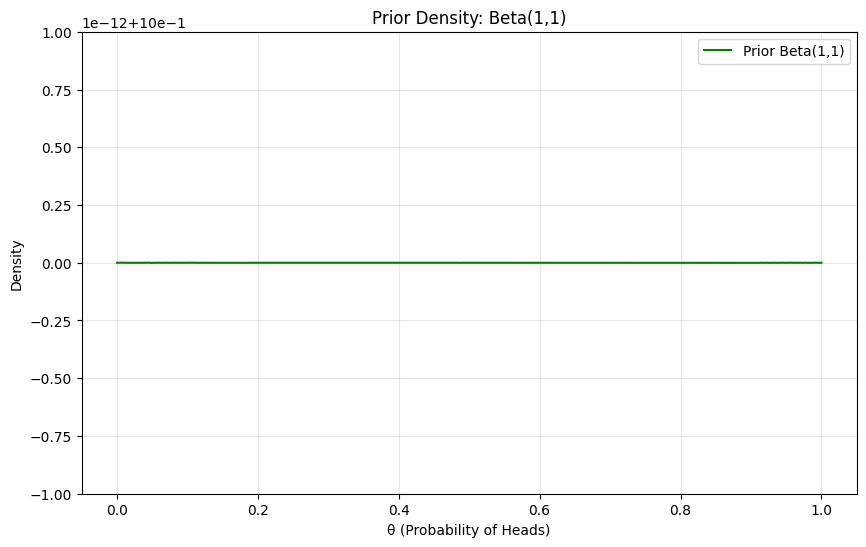

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Theta values
theta = np.linspace(0, 1, 1000)

# Prior PDF
prior_pdf = beta.pdf(theta, alpha_prior, beta_prior)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(theta, prior_pdf, label="Prior Beta(1,1)", color="green")

# Labels and title
plt.title("Prior Density: Beta(1,1)")
plt.xlabel("θ (Probability of Heads)")
plt.ylabel("Density")
plt.grid(alpha=0.3)
plt.legend()

plt.show()

#### Plot the posterior density and mark the posterior mean on the graph.

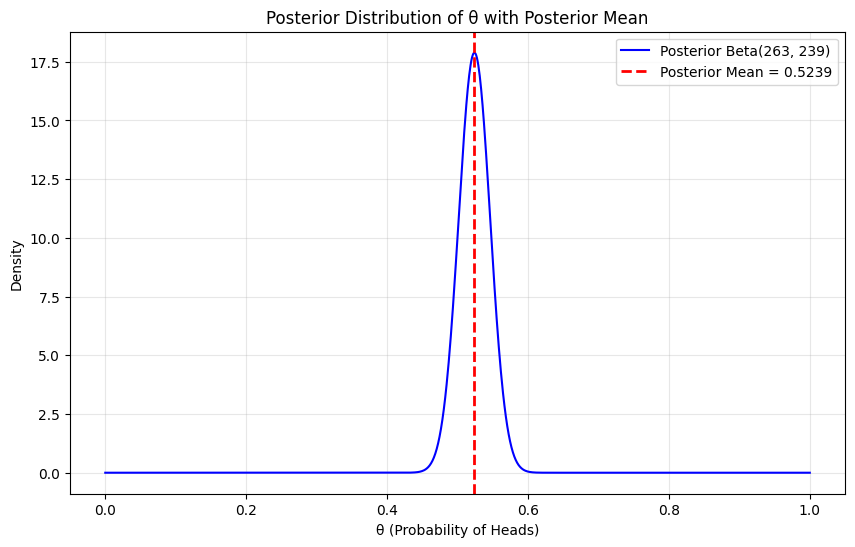

In [4]:
# Create theta values
theta = np.linspace(0, 1, 1000)

# Compute posterior PDF
posterior_pdf = beta.pdf(theta, alpha_post, beta_post)

# Compute posterior mean
posterior_mean = alpha_post / (alpha_post + beta_post)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(
    theta,
    posterior_pdf,
    label=f"Posterior Beta({alpha_post}, {beta_post})",
    color="blue",
)
plt.axvline(
    posterior_mean,
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Posterior Mean = {posterior_mean:.4f}",
)

# Titles and labels
plt.title("Posterior Distribution of θ with Posterior Mean")
plt.xlabel("θ (Probability of Heads)")
plt.ylabel("Density")
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()

## Finally, here are some more summary statistics for our posterior distribution.

In [6]:
# Mean
mean = alpha_post / (alpha_post + beta_post)

# Mode
mode = (alpha_post - 1) / (alpha_post + beta_post - 2)

# Variance
variance = (alpha_post * beta_post) / (
    (alpha_post + beta_post) ** 2 * (alpha_post + beta_post + 1)
)

# Standard deviation
std_dev = np.sqrt(variance)

# 95% credible interval
lower_ci, upper_ci = beta.ppf([0.025, 0.975], alpha_post, beta_post)

# Median
median = beta.ppf(0.5, alpha_post, beta_post)

print(
    f"θ∣X∼Beta({alpha_post}, {beta_post})",
    f"Mean: {mean:.2f}",
    f"Mode: {mode:.2f}",
    f"Variance: {variance}",
    f"Standard Deviation:{std_dev}",
    f"95% Credible Interval:[{lower_ci:.2f},{upper_ci:.2f}]",
    f"Median: {median:.2f}",
    sep="\n",
)

θ∣X∼Beta(263, 239)
Mean: 0.52
Mode: 0.52
Variance: 0.0004958818697787719
Standard Deviation:0.022268405191633547
95% Credible Interval:[0.48,0.57]
Median: 0.52


### Summary:
How your belief about 𝜃 changed after observing the data.

Before observing any data, my prior belief was represented by a Beta(1,1) distribution, which reflects complete uncertainty and treats all values of 𝜃 as equally likely. After collecting the coin-flip data, the posterior updated to Beta(263,239), which is much more concentrated than the prior. This posterior centers around a mean of approximately 0.5239, reflecting the proportion of heads observed in the data. Compared to the prior, the posterior strongly favors values near 0.52 and assigns very little probability to extreme values like 0.1 or 0.9. This shows how the observed evidence shifts my belief from total uncertainty to a more informed estimate that the coin may be slightly more likely to land heads than tails.


How increasing the number of coin flips affects the concentration of the posterior
distribution

As the number of coin flips increases, the posterior distribution becomes more concentrated (narrower) around the true underlying value of 𝜃. This happens because more data reduces uncertainty: the parameters α + x and β + n − x become larger, which mathematically makes the Beta posterior distribution sharper and less spread out. With fewer flips, the posterior is wide, since many θ values are plausible. With many flips, the distribution focuses tightly around the observed proportion of heads. In the limit of very large sample sizes, the posterior would concentrate almost entirely around the true probability of heads.